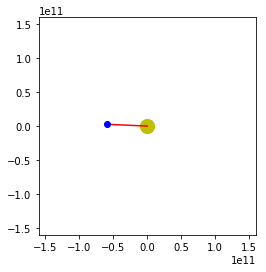

2.74e-03 years
K= 3.01e+07 U= 1.21e+01 E= 3.01e+07


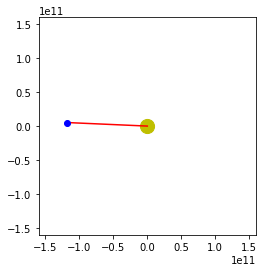

5.48e-03 years
K= 6.83e+08 U= 2.33e+06 E= 6.86e+08


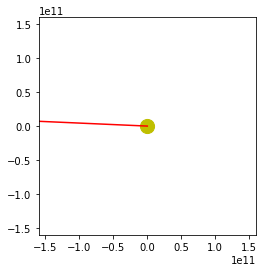

8.22e-03 years
K= 6.83e+08 U= 3.30e+06 E= 6.87e+08


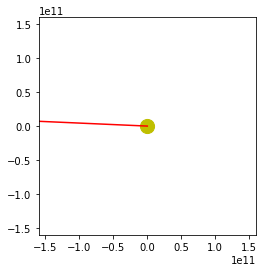

1.10e-02 years
K= 6.83e+08 U= 4.04e+06 E= 6.87e+08


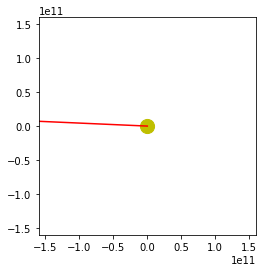

1.37e-02 years
K= 6.83e+08 U= 4.67e+06 E= 6.88e+08


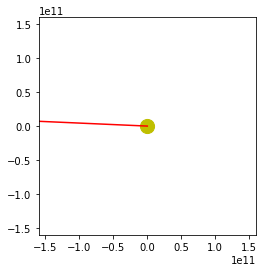

1.64e-02 years
K= 6.83e+08 U= 5.22e+06 E= 6.89e+08


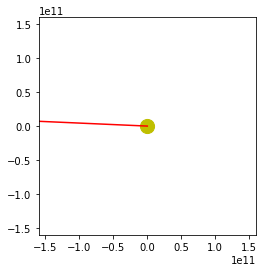

1.92e-02 years
K= 6.83e+08 U= 5.72e+06 E= 6.89e+08


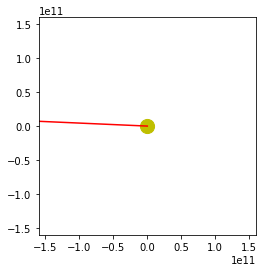

2.19e-02 years
K= 6.83e+08 U= 6.17e+06 E= 6.90e+08


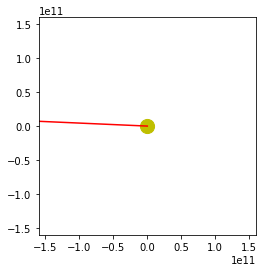

2.47e-02 years
K= 6.83e+08 U= 6.60e+06 E= 6.90e+08


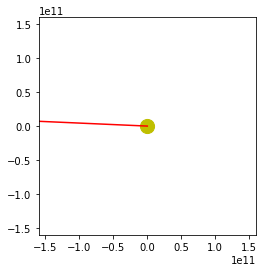

2.74e-02 years
K= 6.83e+08 U= 7.00e+06 E= 6.90e+08


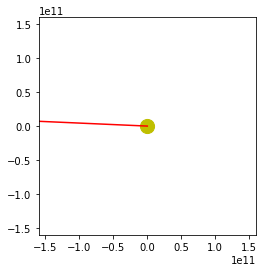

3.01e-02 years
K= 6.83e+08 U= 7.38e+06 E= 6.91e+08


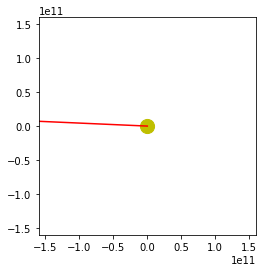

3.29e-02 years
K= 6.83e+08 U= 7.74e+06 E= 6.91e+08


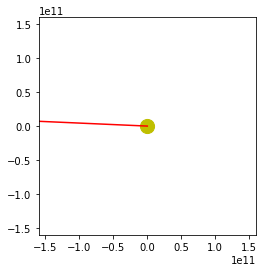

3.56e-02 years
K= 6.83e+08 U= 8.08e+06 E= 6.91e+08


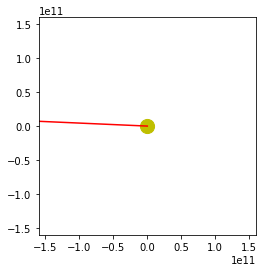

3.84e-02 years
K= 6.83e+08 U= 8.41e+06 E= 6.92e+08


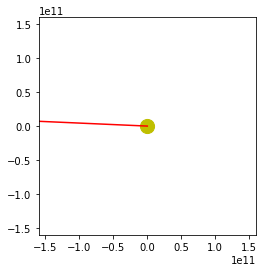

4.11e-02 years
K= 6.83e+08 U= 8.73e+06 E= 6.92e+08


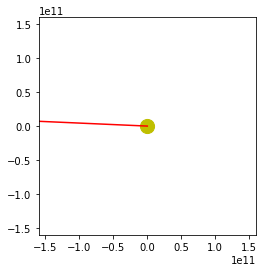

4.38e-02 years
K= 6.83e+08 U= 9.04e+06 E= 6.92e+08


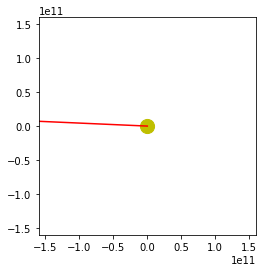

4.66e-02 years
K= 6.83e+08 U= 9.33e+06 E= 6.93e+08


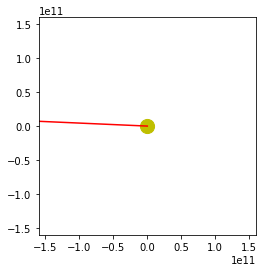

KeyboardInterrupt: 

In [5]:
#!/usr/bin/env python
'''
File name: simple_orbit_circular.py
Author: C.Glenz
Date created: 11/21/2017
Python version: 3.6
License: GPL
Description: A simple visual model one object orbiting around another in a circular path
'''

import matplotlib.pyplot as plt
from math import cos, sin, tan, sqrt, atan

#initialized variables and constants
t = 0.0
#mass of the sun
m0 = 1.989E3
#g value
g = 9.8

#Object 1 (Earth at aphelion(, i.e. furthest point from the Sun))
#start the Earth at x1=distance from sun at aphelion and y1=0
x1 = 1.52104285
y1 = 1.52104285
theta1 = 0.0
#initial values for the x and y components of velocity
v1_x = 0.0
v1_y = 3.029E4
#mass of the Earth
m1=1.0

#set up time interval
day = 24*3600
year = 365.2425*day
t_max = 100000000*year
dt = 1*day

# x data

X1 = [x1,]

# y data
Y1=[y1,]

while t < t_max:

    #figure out the distance between the planet and the sun
    r1 = sqrt(abs(x1+y1))

    # calculate the velocity of the planet and use this to find the kinetic energy
    v = sqrt(v1_x**2+v1_y**2)
    K=0.5*m0*v

    #calculate the potential energy of the planet, use U=mgh
    U=m1*g*r1

    # find the total energy of the planet
    E = K + U

    #calculate the gravitational force between the objects
    f1_g = g*m0*m1/(r1)

    #calculate the gravitational acceleration between the objects
    a1_g = f1_g/m0

    #separate the accleration into x and y components
    a1_x = a1_g*cos(theta1)
    a1_y = a1_g*sin(theta1)

    #update the x and y components of velocity based upon prior values and the acceleration

    #lame hack to determine if velocities should be increasing or decreasing due to the quadrant; better way???

    if x1>0.0:
        if y1 >0.0:
            v1_x = v1_x - a1_x*dt
            v1_y = v1_y - a1_y*dt
        else:
            v1_x = v1_x - a1_x*dt
            v1_y = v1_y + a1_y*dt

    if x1<0.0:
        if y1 >0.0:
            v1_x = v1_x + a1_x*dt
            v1_y = v1_y - a1_y*dt
        else:
            v1_x = v1_x + a1_x*dt
            v1_y = v1_y + a1_y*dt

    # update the x and y positions based upon prior values and new components of velocity
    x1 = x1 + v1_x*dt
    y1 = y1 + v1_y*dt

    #add the new x and y values to the list
    X1.append(x1)
    Y1.append(y1)

    #calculate a new theta based upon the new position
    theta1=atan(abs(y1/x1))

    #update the time
    t=t+dt

    #plot the values
    if t>0*year:
        plt.plot(X1,Y1,'-r')
        #make a large dot for the Sun at 0,0
        plt.scatter(0,0,c='y',marker='o',s=200)
        plt.axis([-1.6E11,1.6E11,-1.6E11,1.6E11])
        plt.plot(x1,y1,'-ob')
        plt.gca().set_aspect('equal')
        plt.show()
        plt.pause(0.1)

        print('{:0.2e}'.format(t/(365*24*3600))+' years')

        print('K= ' + '{:0.2e}'.format(K)+' U= '+'{:0.2e}'.format(U)+' E= '+'{:0.2e}'.format(E))
        
        
        
        

        
        
        